# What is the present and future trend of temperature change in Europe with regard to carbon and nitrogen emission ? Do sea lines play any significant role in temperature change in Europe? 
### Author: Hironmoy Ahmad

### Motivation:

The world we know is changing. The climate change is one of the most important issues that face the world in this technological era and it is a long-term change in the average weather patterns that have come to define Earth’s local, regional and global climate. Changes observed in Earth’s climate since the early 20th century are primarily driven by human activities, particularly waste items like domestic and industrial wastewater, incineration,solid foodwaste and so on. These wastes' increases heat-trapping greenhouse gas levels in Earth’s atmosphere, raising Earth’s average surface temperature. These human-produced temperature increases are commonly referred to as global warming.

In this analysis, our goal is to find out the temperature change pattern in europe because of emissions due to wastes. We will further look into the fact if coastal areas show a different trend in temparature change than other coutries without a direct sea connection. In the last part we will try to forecast the temperature change data for the next 10 years. 

The question may come what is the significance of taking waste data into account while there is other facotrs affecting the climate as well. There have a number of research been done in this aspect. Here a research [What's Really Warming The Sun](https://www.bloomberg.com/graphics/2015-whats-warming-the-world/) by Eric Roston and Blacki Migliozzi in Bloomsberg Businessweek(2015) can be mentioned. This research shows that the most significant role played in temperature change is the human factor mostly because of human wastes. That is why this research will be based on wastage leading towards carbon and nitrogen emissions. 

For the second part of the question, it is important to understand the temperature change pattern for coastal areas as these areas are point of interest for marine geoscience and marine ecology. The latest report from the United Nations Intergovernmental Panel on Climate Change is confronting. It finds global mean sea levels rose by about 20 centimetres between 1901 and 2018. In fact, sea levels have risen faster over the last hundred years than any time in the last 3,000 years. This acceleration is expected to continue. A further 15-25cm of sea level rise is expected by 2050, with little sensitivity to greenhouse gas emissions between now and then. Beyond 2050, however, the amount of sea level rise will largely depend on our future emissions. [See the Reference](https://theconversation.com/how-high-above-sea-level-am-i-if-youve-googled-this-youre-likely-asking-the-wrong-question-an-expert-explains-165882). Also sea warming has a negative impact on marine life and ecosystem. That is why we felt that it is important to also take a look in temperature change pattern for coastal areas. 

### Overview of the Data

Our goal is to try to find out the trend of the temperature change in europe. And we are also interested in finding the conncetion between temperature change and carbon and nitrogen emission due to waste. For analysis, we need data about yearly temperature change, yearly emission rates for european countries.

Looking for the data we have found out that The Global Surface Temperature Change data distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS) is publicly available. 

The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by country, with annual updates. The current dissemination covers the period 1961–2020. Statistics are available for monthly, seasonal and annual mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. According to the license of Statistical Database Terms of Use, the data set can be used for research, statistical, and scientific purposes. It can be access, download, create copies and re-disseminated datasets subject to these Dataset Terms. The standard deviation of the temperature change of the baseline methodology is also available. It includes areas of all the countries and territories of the world. The data covers monthly, seasonal, yearly temperature changes as Celsius degrees °C between 1961 and 2019. The frequency of dissemination and Release calendar of the data is the yearly base. The format is a comma-separated value (CSV) file. 

For our analysis, we are taking the yearly change of temperature. So we are interested in meterological year data of temperature change. Our driving question is to work on european temperature change. So we have filtered and downloaded the data for european countries only.   


### Data Retrieval 

For our analysis we have collected two different datasets. One is yearly temperature change and another is yearly emission data. The datasource is: 

[Temperature change data](https://www.fao.org/faostat/en/#data/ET)

[Waste due to emission data](https://www.fao.org/faostat/en/#data/GW)

### Analysis plan:  

Based on our driving question, motivation and collected data, we are dividing our analysis in these key questions: 
1. What is the present trend of temperature Change in Europe?
2. Is there significant difference in temperature change pattern for european countries based on sea conection? 
3. What impact do carbon and nitrogen emission have on temperature change trend?
4. How is the future trend of temperature change in Europe?

Our analysis plan will be to answer these questions based on data exploration, visualization and prediction. At first we will take a closer look at our dataset. The variables we are interested in: temperature change dataset- Area, Months, Year, Value, Unit 
waste due to emission dataset- Area, Element, Item, Year, Unit, Value.

At first, we are sorting the value by year and area column so that we can have the chronological year in ascending and the countries are sorted alphabatically.then, If we look at the two datasets closely, we can see that for temperature dataset, we have data starting from 1961. But in waste dataset, we are having the value from 1990. We are interested in temperature change with respect to different wastes. So we have to merge down the two different datasets. So it is better for understanding to work with data which is available for same years. So we will drop the rows before the year 1990. In order to do that, first we will make the years of temperature dataset as index and then we will drop the index values until 1990.

In our analysis we will also group our dataset based on sea-line. The two subsets will be coastal countries with a direct connection to sea and non-coastal countries without a direct connection to sea. To keep a simple analysis we have decided to center our interest in Western Europe and mid-Europe. The list of countries are: 
 - Coastal countries: 
    - Germany, Portugal, Italy, Spain, France, Portugal
 - Non-Coastal countries: 
    - Slovakia, Austria, Czechia, Hungary, Switzerland

Secondly, when we look closely to the dataset 'waste' we can see that there are 6 different types of emissions:
CO2eq(SAR),CO2eq(AR4),CO2eq(AR4),CO2,CH4,N2O.

The dataset is showing us for a specific country how much emission we had in a specific year in terms of gigagrams or kilotonnes by means of four different waste items: Domestic Wastewater,Solid Foodwaste,Incineration and Industrial Wastewater.

So our plan is to compute the temperature change for each country in europe. Then try to look at the emissions for each year. And try to find out the relationship between them. Meaning we want to find out how much these emissions are affecting the temperature change for european countries over the last 30 years.



After we try to find out the pattern or trend in temperature change with regard to emission, we would like to use time series to predict temperature change for the next decade. Our goal is to use machine learning algorithm for the prediction. We have data until 2020. We will fit our ML model to predict until 2030. 




## Load required libraries

In [1]:
import numpy as np
import pandas as pd
import requests
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import statsmodels.api as sm
import matplotlib as mpl
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
import matplotlib.pylab
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16
import warnings
warnings.filterwarnings("ignore")
import itertools
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
from pandas.tseries.offsets import DateOffset

### Load the dataset

In [2]:
waste_europe = pd.read_csv("D:\\Fall semester 2021\\Data Science Tools in Python\\Final Project\\Data\\waste_europe.csv")
waste_europe.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,GW,Waste Disposal,3,Albania,723112,Emissions (CO2eq) (SAR),6988,Domestic wastewater,1990,1990,gigagrams,149.831994,Fc,Calculated data
1,GW,Waste Disposal,3,Albania,723112,Emissions (CO2eq) (SAR),6988,Domestic wastewater,1991,1991,gigagrams,149.410466,Fc,Calculated data
2,GW,Waste Disposal,3,Albania,723112,Emissions (CO2eq) (SAR),6988,Domestic wastewater,1992,1992,gigagrams,151.277725,Fc,Calculated data
3,GW,Waste Disposal,3,Albania,723112,Emissions (CO2eq) (SAR),6988,Domestic wastewater,1993,1993,gigagrams,151.870769,Fc,Calculated data
4,GW,Waste Disposal,3,Albania,723112,Emissions (CO2eq) (SAR),6988,Domestic wastewater,1994,1994,gigagrams,153.203700,Fc,Calculated data


In [3]:
temperature_yearly = pd.read_csv("D:\\Fall semester 2021\\Data Science Tools in Python\\Final Project\\Data\\temperature_yearly.csv")
temperature_yearly.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,3,Albania,7271,Temperature change,7020,Meteorological year,1961,1961,°C,0.639,Fc,Calculated data
1,ET,Temperature change,3,Albania,7271,Temperature change,7020,Meteorological year,1962,1962,°C,0.345,Fc,Calculated data
2,ET,Temperature change,3,Albania,7271,Temperature change,7020,Meteorological year,1963,1963,°C,0.078,Fc,Calculated data
3,ET,Temperature change,3,Albania,7271,Temperature change,7020,Meteorological year,1964,1964,°C,-0.166,Fc,Calculated data
4,ET,Temperature change,3,Albania,7271,Temperature change,7020,Meteorological year,1965,1965,°C,-0.388,Fc,Calculated data


#### Check for missing values

In [4]:
pd.DataFrame(temperature_yearly.isnull().sum())

,0
Domain Code,0
Domain,0
Area Code (FAO),0
Area,0
Element Code,0
Element,0
Months Code,0
Months,0
Year Code,0
Year,0


In [5]:
pd.DataFrame(waste_europe.isnull().sum())

,0
Domain Code,0
Domain,0
Area Code (FAO),0
Area,0
Element Code,0
Element,0
Item Code,0
Item,0
Year Code,0
Year,0


In the two datasets we are working on, there is no value missing. So we do not need to treat for missing valuse and our dataset is ready for analysis. 

### Important variables:

Our goal is to try to find out the trend of the global temperature change. Inspecting the temp_europe dataset and waste_europe dataset we have found out these variables are affecting factors. Later on further assesment will be done to check the correlation between the variables. The variables we are interested in: 
temp_europe dataset-
Area, Months, Year, Value, Unit
waste_europe dataset-
Area, Element, Item, Year, Unit, Value. 


### Creating Subset

In [6]:
temperature_euro = temperature_yearly.loc[:,['Area', 'Months','Year','Value']]
temperature_euro.head()

,Area,Months,Year,Value
0,Albania,Meteorological year,1961,0.639
1,Albania,Meteorological year,1962,0.345
2,Albania,Meteorological year,1963,0.078
3,Albania,Meteorological year,1964,-0.166
4,Albania,Meteorological year,1965,-0.388


In [7]:
waste = waste_europe.loc[:,['Area', 'Element','Item','Year','Unit','Value']]
waste.head()

,Area,Element,Item,Year,Unit,Value
0,Albania,Emissions (CO2eq) (SAR),Domestic wastewater,1990,gigagrams,149.831994
1,Albania,Emissions (CO2eq) (SAR),Domestic wastewater,1991,gigagrams,149.410466
2,Albania,Emissions (CO2eq) (SAR),Domestic wastewater,1992,gigagrams,151.277725
3,Albania,Emissions (CO2eq) (SAR),Domestic wastewater,1993,gigagrams,151.870769
4,Albania,Emissions (CO2eq) (SAR),Domestic wastewater,1994,gigagrams,153.203700


#### Sort values by Year and Area

Here we are sorting the value by year and area column so that we can have the chronological year in ascending and the countries are sorted alphabatically. 

In [8]:
temperature_euro.sort_values(by=['Year','Area'], ascending = True)
temperature_euro.head()

,Area,Months,Year,Value
0,Albania,Meteorological year,1961,0.639
1,Albania,Meteorological year,1962,0.345
2,Albania,Meteorological year,1963,0.078
3,Albania,Meteorological year,1964,-0.166
4,Albania,Meteorological year,1965,-0.388


According to the analysis plan we will try to find the answer to the questions one by one in the next steps. 

### <font color=blue>1. What is the present trend of temperature Change in Europe?</font> 

To answer this question we will work with the <font color=red>_temperature_euro_</font> dataset. If we take a closer look we will see that for each country there are temperature change values from 1961 to 2020. We will take the mean for each country and plot that to check the present trend. 
In this case we will make the year variable index so that we can plot the graph for present trend and this new dataset will also help us in further steps of analysis in predicting future trend. We will also check the data type of the variable 'Year' values. A data type object (an instance of numpy.dtype class) describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted ([Reference](https://numpy.org/devdocs/reference/arrays.dtypes.html)). 

In [9]:
temperature_euro.dtypes


Area       object
Months     object
Year        int64
Value     float64
dtype: object

The data value of variable 'Year' is int64. This means it is an integer value and we have to make it a datatime object. So that we can use this values to plot our present trend here and then predict the future trend. 

In [10]:
#Creating a new variable
temperature_euro['year'] = pd.to_datetime(temperature_euro['Year']).dt.year

In [11]:
#Changing the data type
temperature_euro['year'] = pd.to_datetime([f'{y}-1-1' for y in temperature_euro.Year])

In [12]:
#Checking the data types
temperature_euro.dtypes

Area              object
Months            object
Year               int64
Value            float64
year      datetime64[ns]
dtype: object

So we have a created a new variable. Now let us check the modified dataset. 

In [13]:
temperature_euro.head()

,Area,Months,Year,Value,year
0,Albania,Meteorological year,1961,0.639,1961-01-01
1,Albania,Meteorological year,1962,0.345,1962-01-01
2,Albania,Meteorological year,1963,0.078,1963-01-01
3,Albania,Meteorological year,1964,-0.166,1964-01-01
4,Albania,Meteorological year,1965,-0.388,1965-01-01


We are only interested in the varibale 'year' and 'Value' because we will only need these two to plot the present trend. And we will also make the variable 'year' as the index for our own reference. 

In [14]:
temp = temperature_euro.groupby(['year', 'Value']).sum().reset_index(drop=False).groupby('year').mean()
temperature = temp.loc[:,['Value']]
temperature.head()

,Value
year,
1961-01-01,0.865667
1962-01-01,-0.256111
1963-01-01,-0.548722
1964-01-01,-0.043028
1965-01-01,-0.509000


Now we will plot the temperature change values for each year for all the countries in Europe. 

#### <font color=blue>1a. Plot of Present Trend of Temperature Change in Europe</font> 

Text(0.5, 1.0, 'Present trend of temperature change in Europe')

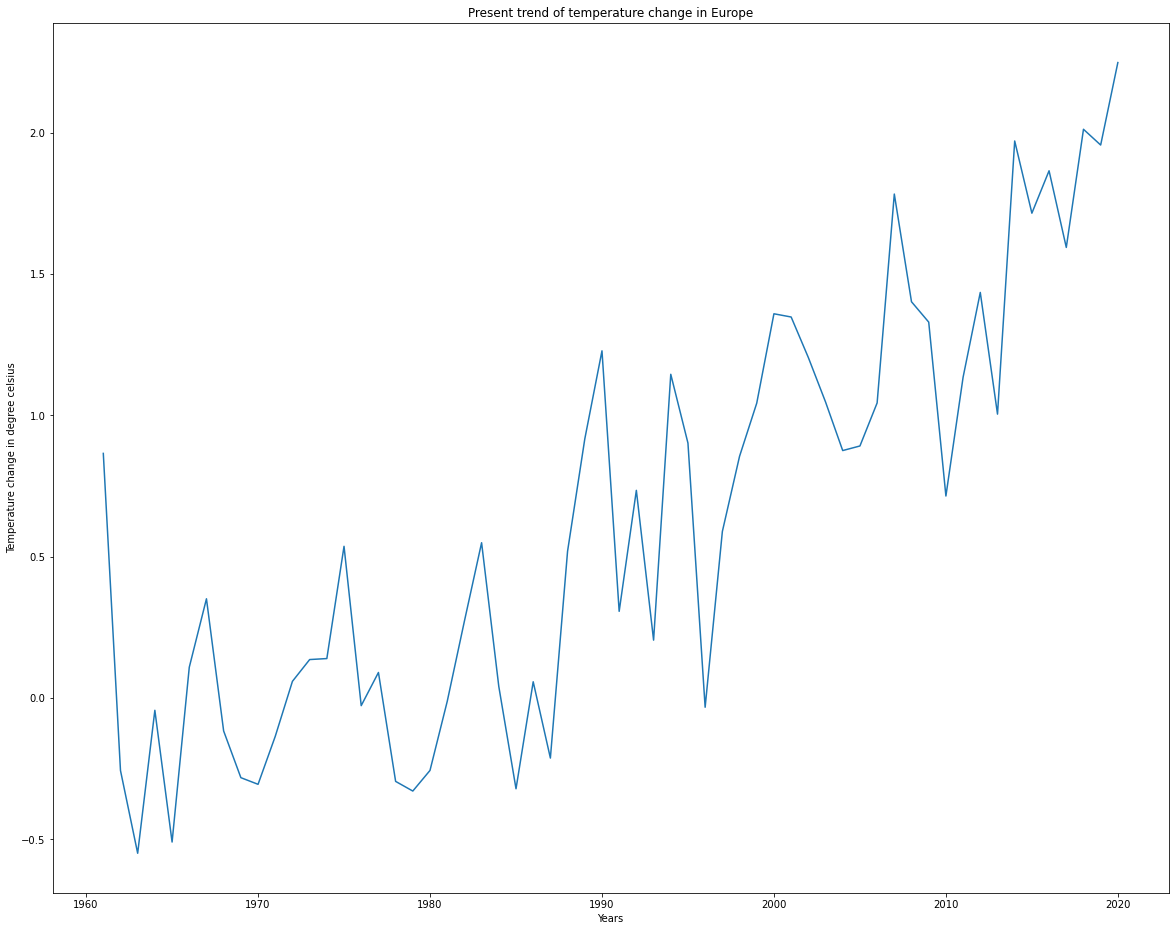

In [15]:
plt.plot(temperature['Value'])
plt.xlabel("Years")
plt.ylabel("Temperature change in degree celsius")
plt.title("Present trend of temperature change in Europe")

#### <font color=blue>1b. Explanation of the plot</font> 

The above plot indicates an upward trend eventhough there are plenty of peak and drop throughout the years. This is an overall trend as we have taken the average of all the countrie's temperature change data. To better understand the temperature change, we need to take a deeper look into the temperature dataset and take a subset of different countries based on coastal and non-coastal region. Then we will plot a facet diagram for better understanding. 

### <font color=blue>2. Is there significant difference in temperature change pattern for european countries based on sea conection?</font> 

#### <font color=blue>2.a Facet plotting of temperature change of coastal and non coastal countries</font>

In [16]:
# Creating Coastal country subset 
temperature_coastal = temperature_euro[temperature_euro['Area'].isin(['Germany','Portugal',
'Spain','Italy','France', 'Poland'])]


# Creating Non-Coastal country subset 
temperature_non_coastal = temperature_euro[temperature_euro['Area'].isin(['Slovakia', 'Austria', 
'Czechia', 'Hungary', 'Switzerland'])]


In [17]:
temperature_coastal.head()

,Area,Months,Year,Value,year
716,France,Meteorological year,1961,0.830,1961-01-01
717,France,Meteorological year,1962,-0.303,1962-01-01
718,France,Meteorological year,1963,-0.952,1963-01-01
719,France,Meteorological year,1964,0.028,1964-01-01
720,France,Meteorological year,1965,-0.625,1965-01-01


#### <font color = blue>2.a.1 Coastal countries temperature change facet plot</font>

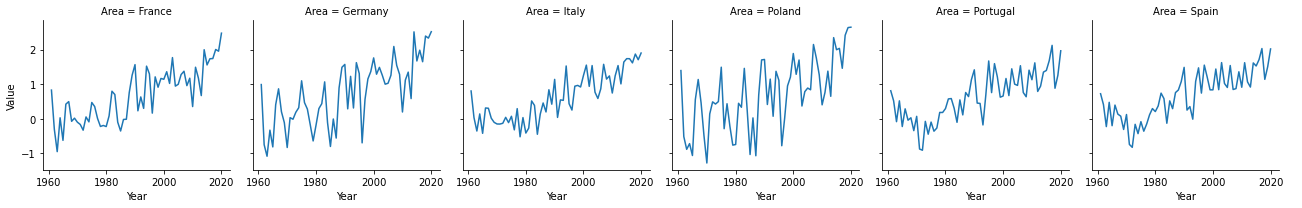

In [18]:
coastal_graph = sns.FacetGrid(temperature_coastal, col ='Area')
# map the above form facetgrid with some attributes
coastal_graph.map(sns.lineplot, "Year", "Value").add_legend()
# show the object
plt.show()

#### <font color = blue>2.a.2 Non-Coastal countries temperature change facet plot</font>

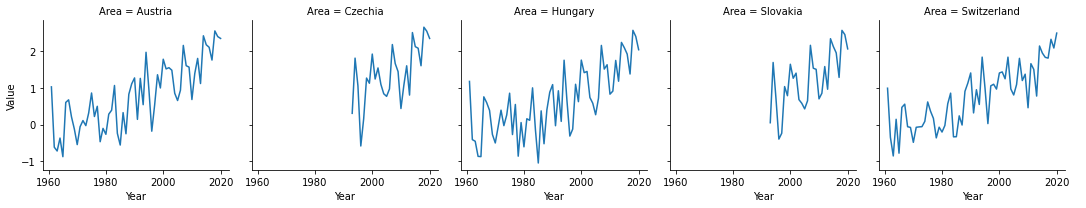

In [19]:
non_coastal_graph = sns.FacetGrid(temperature_non_coastal, col ='Area')
# map the above form facetgrid with some attributes
non_coastal_graph.map(sns.lineplot, "Year", "Value").add_legend()
# show the object
plt.show()

#### <font color = blue>2.b Explanation of the plot </font>

The first observation comes in our mind when take a look at this two sets of plots is that For Czechia and Slovakia, the line starts from around 1990. That means we do not have data before that. We can take a look at this by filtering the temperature_euro dataset. 

In [20]:
Czechia = temperature_euro[temperature_euro['Area'].isin(['Czechia'])]
Slovakia = temperature_euro[temperature_euro['Area'].isin(['Slovakia'])]

In [21]:
Czechia.head()

,Area,Months,Year,Value,year
447,Czechia,Meteorological year,1993,0.306,1993-01-01
448,Czechia,Meteorological year,1994,1.818,1994-01-01
449,Czechia,Meteorological year,1995,1.058,1995-01-01
450,Czechia,Meteorological year,1996,-0.588,1996-01-01
451,Czechia,Meteorological year,1997,0.155,1997-01-01


In [22]:
Slovakia.head()

,Area,Months,Year,Value,year
2066,Slovakia,Meteorological year,1993,0.049,1993-01-01
2067,Slovakia,Meteorological year,1994,1.699,1994-01-01
2068,Slovakia,Meteorological year,1995,0.704,1995-01-01
2069,Slovakia,Meteorological year,1996,-0.399,1996-01-01
2070,Slovakia,Meteorological year,1997,-0.239,1997-01-01


For both the countries we have data after 1993. That is why the line plot came like that. 

Now we take a look at the similiarities between the plots. We can find some countrywise similarities. Germany, Switzerland and Poland is giving us similar kind of trends but in Poland there are drastical change in peak and drop. Portugal and Spain is giving us almost alike trend while Italy is slightly different than them. In case of France, her trend is almost like Germany but the magnitude of the nodes are not so drastic like Germany. And Slovakia and Czechia givers almost similar kind of trends. 

#### What insights can we get from these line plots? 

We are plotting the temperature change for different countries. What is the definition of the data we have. Accoriding to the [source](https://www.fao.org/faostat/en/#data/ET) we are taking mean temperature anomalies, i.e., temperature change with respect to a baseline climatology. 
The first and foremost thing is that even if we subgroup the countries based on there connection to the sea, the tendencey of giving similar kind of trends is not based on sea line in this case. The neighbouring countries are giving more similar trends. The reason behind that is we cannot put a boundary on temperature. Again, we have taken the average of temperature change of a country. But that is also very generalized. Dor example, even for a small city or place, if there is raining in one area of the city, it may not rain the whole place. If we take a look at Germany, we see that Germany is a large country. The temperature difference will be significant in the North-West part than the South. So when we take the average, it will not give the exact scenerio of the coastal and non-coastal part of the country. 

In case of France and Germany, we are having a similar kind of trend but France has less drastical ups and downs in temperature change than Germany. If we take a closer look, we will see that France, Portugal, Spain and Italy has less drastical change in magnitude than other countries. So, what is common in these countries? They all are neighbouring countries. To check this discussion, we will take another neighbouring country Andorra and check her temprature change pattern over the years. 


In [23]:
Andorra = temperature_euro[temperature_euro['Area'].isin(['Andorra'])]
Andorra.head()

,Area,Months,Year,Value,year
60,Andorra,Meteorological year,1961,0.744,1961-01-01
61,Andorra,Meteorological year,1962,0.117,1962-01-01
62,Andorra,Meteorological year,1963,-0.746,1963-01-01
63,Andorra,Meteorological year,1964,0.315,1964-01-01
64,Andorra,Meteorological year,1965,-0.499,1965-01-01


In [24]:
Andorra_temp = Andorra.loc[:,['Value', 'year']]
Andorra_temperature = Andorra_temp.set_index('year')
Andorra_temperature.head()

,Value
year,
1961-01-01,0.744
1962-01-01,0.117
1963-01-01,-0.746
1964-01-01,0.315
1965-01-01,-0.499


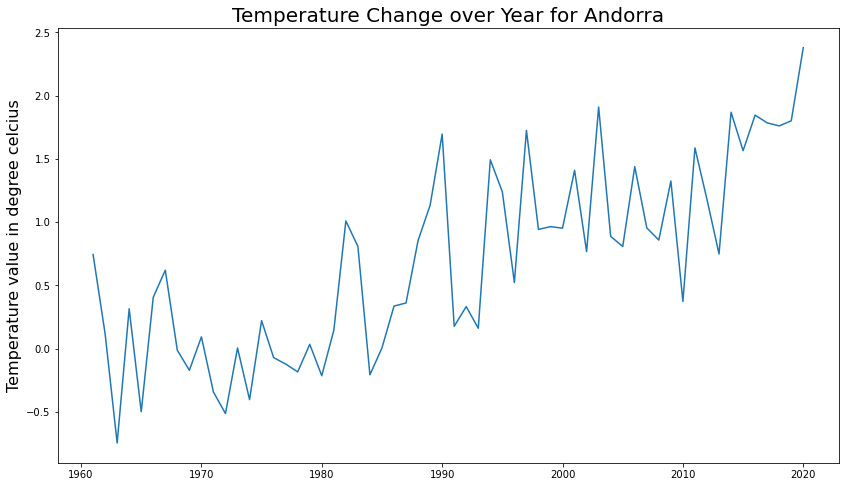

In [25]:
plt.figure(figsize=(14,8))
plt.plot(Andorra_temperature)
plt.title('Temperature Change over Year for Andorra', fontsize=20)
plt.ylabel('Temperature value in degree celcius', fontsize=16)
plt.show()

For Andorra we can also see that the magnitude of temperature change is similar as the other countries in this region. The most common thing between these countries are that they all are surrounded by the sea. We will run another sets of analysis with Greece as Greece is also surrounded by sea but it is not a neighbouring country.  

In [26]:
Greece = temperature_euro[temperature_euro['Area'].isin(['Greece'])]

In [27]:
Greece_temp = Andorra.loc[:,['Value', 'year']]
Greece_temperature = Andorra_temp.set_index('year')

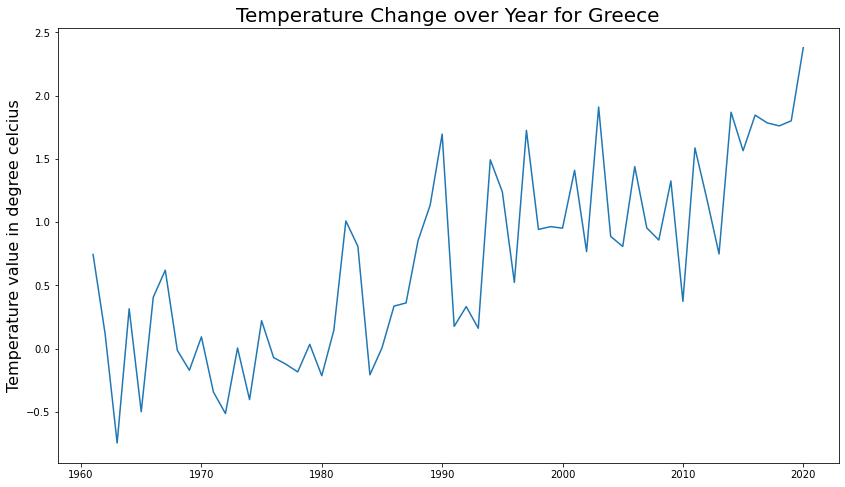

In [28]:
plt.figure(figsize=(14,8))
plt.plot(Greece_temperature)
plt.title('Temperature Change over Year for Greece', fontsize=20)
plt.ylabel('Temperature value in degree celcius', fontsize=16)
plt.show()

Greece is also showing similar kind of results. So now the countries showing similar trends temperature change and the magnitude of temperature change are all sourrounded by the sea. France - Atlantic Ocean and Mediterranean Sea, Portugal - Atlantic Ocean, Spain - Mediterranean Sea, Italy - Mediterranean Sea and Greece - Aegean Sea. So it can be said broadly that sea connection has an impact on temperature change. 

### <font color = blue>3. What impact do carbon and nitrogen emission have on temperature change trend?</font>

The idea behind this is to use the waste dataset we have and try to find a relationship between the temperature change values and the emission due to waste disposal. To complete this analysis, we need to understand the waste dataset first. 

#### <font color=blue>3.1 Dataset understanding: Waste data</font>
If we take a closer look to the dataset 'waste' we can see that there are 6 different types of emissions:

1. CO2eq(SAR)
2. CO2eq(AR4)
3. CO2eq(AR5)
4. CO2
5. CH4
6. N2O
The dataset is showing us for a specific country how much emission we had in a specific year in terms of gigagrams or kilotonnes by means of four different ways:

1. By Domestic Wastewater
2. Solid Foodwaste
3. Incineration 
4. Industrial Wastewater

There are two different types of emission units, gigagrams and kilotonnes. These are basically same amount. In terms of unit of measurement there is no difference. So we will join the six different emissions for our ease. 

We have the data for 1990 to 2020, 30 years. Here we will try to compute the total waste amount and try to find the relationship with temperature change. We will merge the dataset for our ease. 

Both the datasets have a column name 'Value' in them. For our better understanding we will first rename the column name and then merge them.

In [29]:
temp_df_1 =temperature_euro.rename(columns={'Value': 'Temp_change_in_degree_celcius'})
waste_df_1 = waste.rename(columns = {'Value': 'waste_value'})

In [30]:
temp_waste_data = pd.merge(temp_df_1, waste_df_1 , on=["Area","Year"])
temp_waste_data.head()

,Area,Months,Year,Temp_change_in_degree_celcius,year,Element,Item,Unit,waste_value
0,Albania,Meteorological year,1990,0.82,1990-01-01,Emissions (CO2eq) (SAR),Domestic wastewater,gigagrams,149.831994
1,Albania,Meteorological year,1990,0.82,1990-01-01,Emissions (CO2eq) (AR5),Domestic wastewater,kilotonnes,183.653106
2,Albania,Meteorological year,1990,0.82,1990-01-01,Emissions (CO2eq) (AR4),Domestic wastewater,gigagrams,170.648999
3,Albania,Meteorological year,1990,0.82,1990-01-01,Emissions (CH4),Domestic wastewater,kilotonnes,5.530332
4,Albania,Meteorological year,1990,0.82,1990-01-01,Emissions (N2O),Domestic wastewater,kilotonnes,0.108694


In [31]:
# Checking the missing values for our combined dataset

pd.DataFrame(temp_waste_data.isnull().sum())

,0
Area,0
Months,0
Year,0
Temp_change_in_degree_celcius,0
year,0
Element,0
Item,0
Unit,0
waste_value,0


In [32]:
ab = temp_waste_data.loc[:,['Area', 'year', 'Temp_change_in_degree_celcius', 'Item','waste_value']]
ab.head()

,Area,year,Temp_change_in_degree_celcius,Item,waste_value
0,Albania,1990-01-01,0.82,Domestic wastewater,149.831994
1,Albania,1990-01-01,0.82,Domestic wastewater,183.653106
2,Albania,1990-01-01,0.82,Domestic wastewater,170.648999
3,Albania,1990-01-01,0.82,Domestic wastewater,5.530332
4,Albania,1990-01-01,0.82,Domestic wastewater,0.108694


In [33]:
ab.index = ab['year']
ab.sort_index(inplace=True)
temp_waste_euro = ab.loc[:,['Area','Temp_change_in_degree_celcius', 'Item', 'waste_value']]
euro_temp_waste = temp_waste_euro.sort_values(by=['year', 'Area'], ascending = True)
euro_temp_waste.head()

,Area,Temp_change_in_degree_celcius,Item,waste_value
year,,,,
1990-01-01,Albania,0.82,Domestic wastewater,149.831994
1990-01-01,Albania,0.82,Domestic wastewater,183.653106
1990-01-01,Albania,0.82,Domestic wastewater,170.648999
1990-01-01,Albania,0.82,Domestic wastewater,5.530332
1990-01-01,Albania,0.82,Domestic wastewater,0.108694


We have our merged dataset. It is sorted according to year. In this dataset, we can see that for each type of item (there are four types of items: Domestic Wastewater,Solid Foodwaste,Incineration and Industrial Wastewater) the elements are summed up. Now if we try to visualize the dataset, we will get better understanding. 

Again, we make a subset of coastal and non-coastal areas. Then we will visualize the data.

In [34]:
# Creating Coastal country subset 
waste_coastal = temp_waste_data[temp_waste_data['Area'].isin(['Germany','Portugal',
'Spain','Italy','France', 'Poland'])]


# Creating Non-Coastal country subset 
waste_non_coastal = temp_waste_data[temp_waste_data['Area'].isin(['Slovakia', 'Austria', 
'Czechia', 'Hungary', 'Switzerland'])]

#### <font color = blue>3.1.1 Coastal countries emission due to waste facet plot</font>

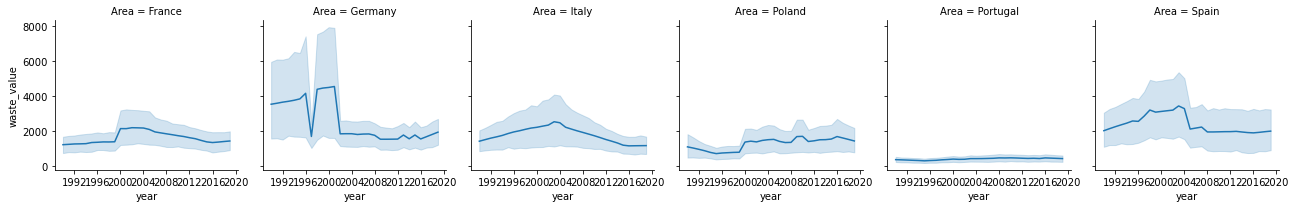

In [35]:
coastal_waste_graph = sns.FacetGrid(waste_coastal, col ='Area')
# map the above form facetgrid with some attributes
coastal_waste_graph.map(sns.lineplot, "year", "waste_value").add_legend()
# show the object
plt.show()

#### <font color = blue>3.1.2 Non-Coastal countries emission due to waste facet plot</font>

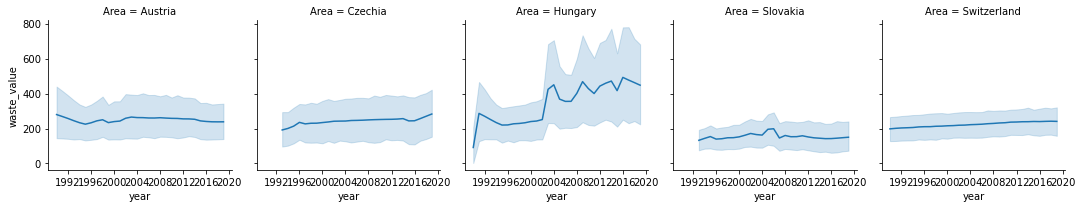

In [36]:
non_coastal_waste_graph = sns.FacetGrid(waste_non_coastal, col ='Area')
# map the above form facetgrid with some attributes
non_coastal_waste_graph.map(sns.lineplot, "year", "waste_value").add_legend()
# show the object
plt.show()

#### <font color = blue>3.2 Explanation of the faceted plot</font>

From the above two facetted plots, we can come to some understanding. Germany has started to control the emission due to waste after 2000 but recently it shows an upward trend. For Italy, it is showing a downward trend. The most drsatic change is visible in Hungary.  
Now, if we give a closer look into Germany's both visualization, we see the most significant drop in temperature change is in 1996-1997. In that time, we have a significant drop in emission due to waste also. 
If we look at Hungary, the peak in temperature change matches with the spike in emission due to waste. And this phenomenon follows for all the countries. 
That leaves us the decision that emission due to waste has a significant role in temperature change.  

### <font color=blue>4. How is the future trend of temperature change in Europe?</font> 

In this part we will try to forecast the temperature change until 2030 based on the data we already have. In this casse we will use the 'temperature' dataframe we created earlier. 

In [37]:
temperature.head()

,Value
year,
1961-01-01,0.865667
1962-01-01,-0.256111
1963-01-01,-0.548722
1964-01-01,-0.043028
1965-01-01,-0.509000


#### <font color=blue>4.1 Dataset Explanation</font> 

 - For simplicity, the Value column above shows the daily average temperatures in the European continent from 1961 to 2020

 - In order to get more information, Python Pandas library provides a 'describe' function to show the count, mean, standard deviation, min/ max value and the quantiles of our dataset.

In [38]:
# Output the maximum and minimum temperature date

print(temperature.loc[temperature["Value"] == temperature["Value"].max()])
print(temperature.loc[temperature["Value"] == temperature["Value"].min()])

               Value
year                
2020-01-01  2.248063
               Value
year                
1963-01-01 -0.548722


- In 1963, the European countries witnessed the coldest about -0.54 degrees celcius. In contrast, In the year 2020 recently, European countries saw the hottest climate with 2.24 degrees Celsius.

- There was not a significant difference between the median and the mean, being approximately 0.57 and 0.63 degrees Celsius respectively.

#### <font color=blue>4.2 Visualization: present trend</font> 

Text(0.5, 0, 'Years')

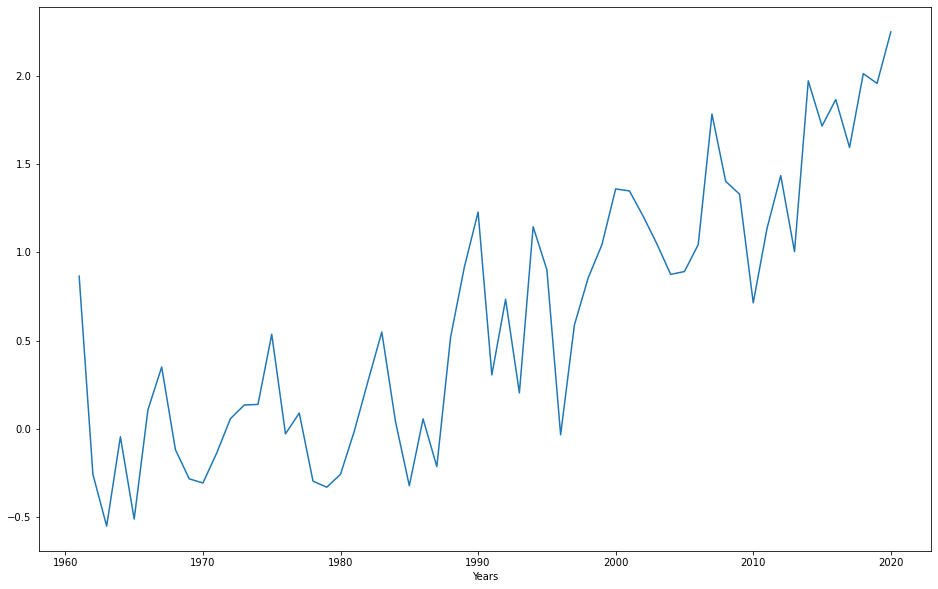

In [39]:
plt.figure(figsize=(16,10))
plt.plot(temperature['Value'])
plt.xlabel("Years")

Now our target is to predict the temperature change of the next 10 years based on the data we have. There are many forecasting models to do that. But we will need to understand which model we should choose for our case. There are couple of things need to be in consideration. First we will check if our data is stationary or not. Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time ([reference](https://www.kdnuggets.com/2019/08/stationarity-time-series-data.html)). So before predicting, our task is to check for stationarity. If the data is non-stationary then we will move forward. We will use Dickey-Fuller test for that.

#### <font color=blue>4.3 Dickey-Fuller test of Stationarity</font> 

In [40]:
dftest = adfuller(temperature['Value'], autolag='AIC')
dftest

(0.6582546171304033,
 0.9889668679052336,
 5,
 54,
 {'1%': -3.55770911573439,
  '5%': -2.9167703434435808,
  '10%': -2.59622219478738},
 50.987335143021895)

In [41]:
#Perform Dickey-Fuller test:
def test_stationarity(timeseries):    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items(): # key, value mapping
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dftest[0] < dftest[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [42]:
test_stationarity(temperature["Value"])

Results of Dickey-Fuller Test:
Test Statistic                  0.658255
p-value                         0.988967
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64
Failed to Reject Ho - Time Series is Non-Stationary


As the p value is larger than 5%, the data is not stationary. 

Now the question comes which Machine Learning model we should follow. This decision should be taken after considering two different parameters:
 - Auto-correlation Fundtion (ACF) and Partial Auto-correlation Function (PACF)
 - Seasonal Decomposition for seasonality. 

#### ACF and PACF

ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band to have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’ ([reference](https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8#:~:text=ACF%20is%20an%20(c%20o,series%20with%20its%20lagged%20values%20.&text=ACF%20considers%20all%20these%20components,a%20partial%20auto%2Dcorrelation%20function.)))
PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation ([reference](https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8#:~:text=ACF%20is%20an%20(c%20o,series%20with%20its%20lagged%20values%20.&text=ACF%20considers%20all%20these%20components,a%20partial%20auto%2Dcorrelation%20function.)))

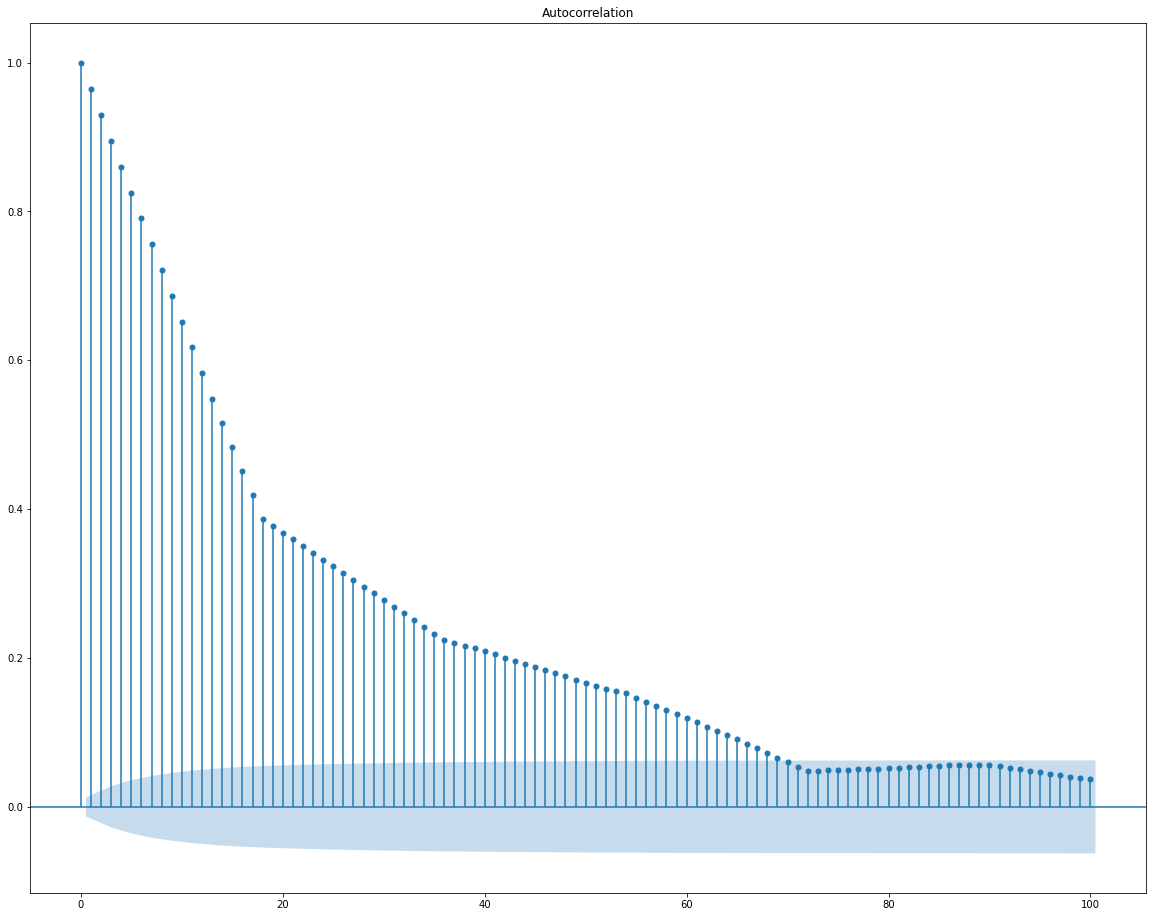

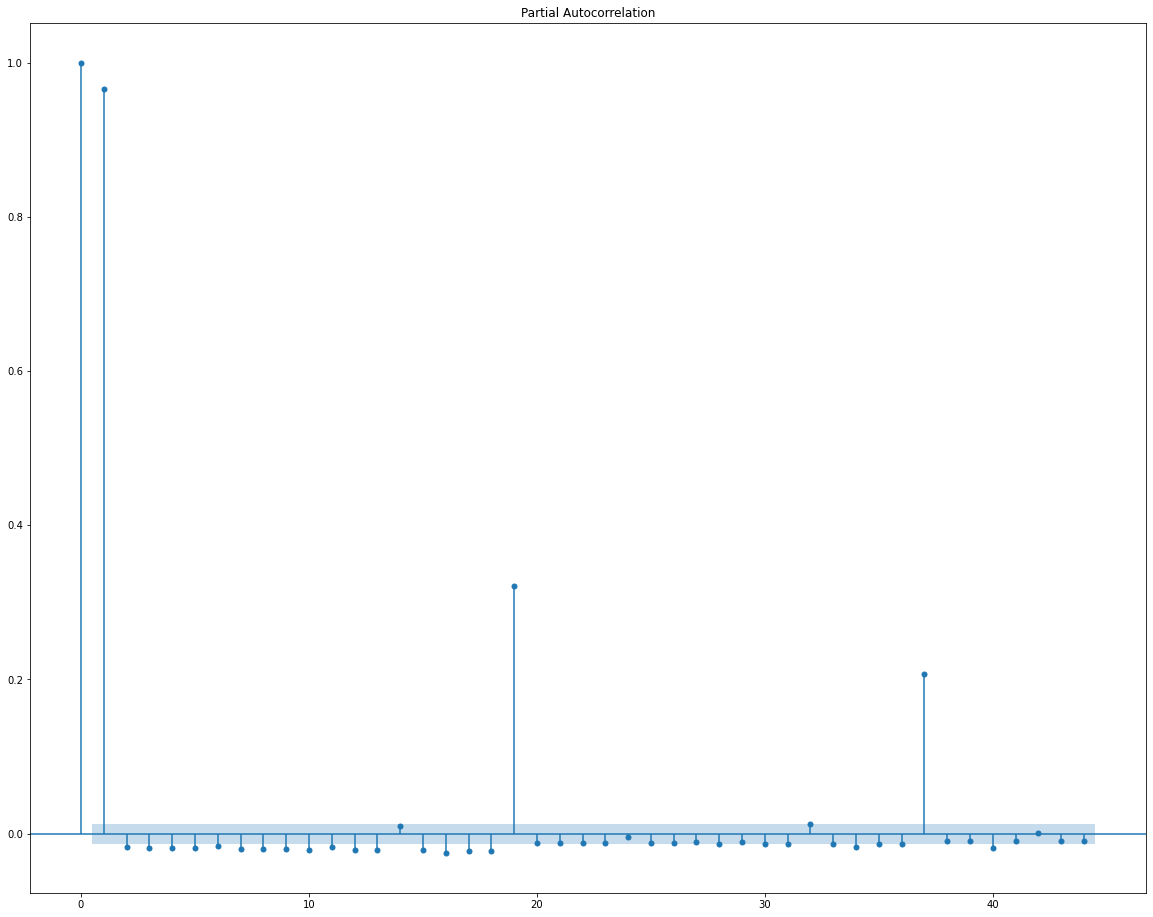

In [43]:
# Plotting ACF and PACF
plot_acf(temp_waste_data['Temp_change_in_degree_celcius'], lags=100)  
plt.show()


plot_pacf(temp_waste_data['Temp_change_in_degree_celcius'])
plt.show()

The geometry of the ACF plot gives us the hint to choose ARIMA model. Because the values of our temperature dataset are correlated with ites lagged values. ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values ([reference](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)).

If there is seasonality present in our data, we have to choose SARIMA model. A SARIMA model is basically ARIMA model but it considers the seasnality of the data. 

So we have to check the seasoanlity now with seaasonal decomposition. 

#### <font color=blue>4.4 Seasonality with Seasonal Decomposition</font> 

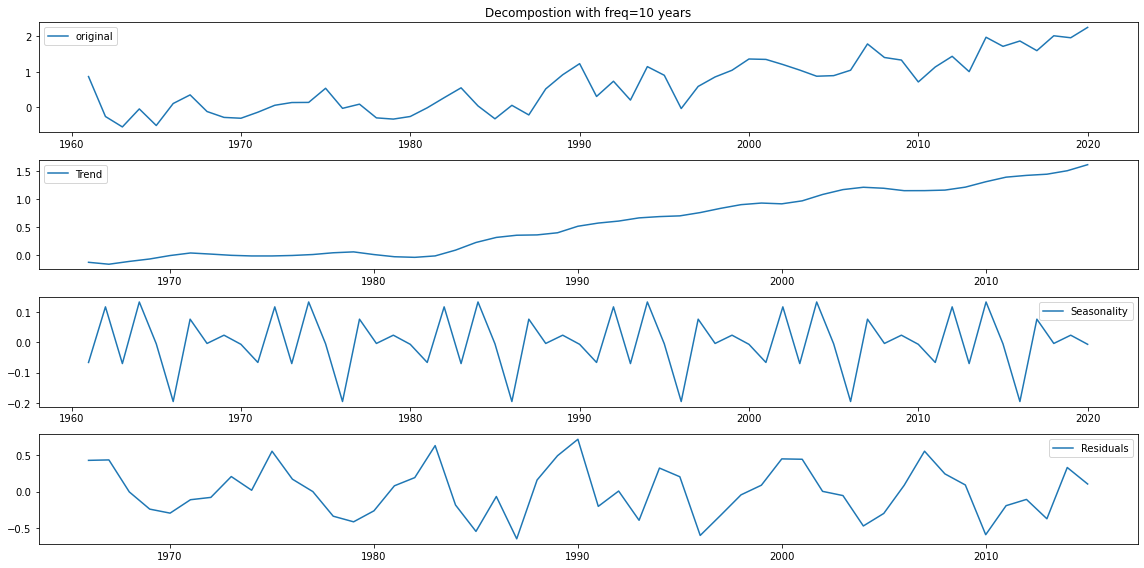

In [44]:
decomposition = seasonal_decompose(temperature["Value"].dropna(), period = 10)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16,8))
plt.subplot(411) # (nrows, ncols, index). 
plt.title("Decompostion with freq=10 years")
plt.plot(temperature["Value"], label="original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

From the above plotting, we have found that there is seasonality in the data. So we have to forecast with SARIMA model.

#### <font color=blue>4.5 Forecasting with SARIMA model</font> 

#### 4.5.1 Baseline model
To calculate the Root mean squared error for the shifting of current year temperature to the next year. Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results ([reference](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/)).

In [45]:
#Shift the current temperature to the next Year. 

predicted_temperature = temperature["Value"].to_frame().shift(1).rename(columns = {"Value": "Value_pred" })
actual_temperature = temperature["Value"].to_frame().rename(columns = {"Value": "Value_actual" })

# Concatenate the actual and predicted temperature
one_step_temperature = pd.concat([actual_temperature,predicted_temperature],axis=1)

# Select from the second row, because there is no prediction for today due to shifting.
one_step_temperature = one_step_temperature[1:]
one_step_temperature.head(10)

,Value_actual,Value_pred
year,,
1962-01-01,-0.256111,0.865667
1963-01-01,-0.548722,-0.256111
1964-01-01,-0.043028,-0.548722
1965-01-01,-0.509000,-0.043028
1966-01-01,0.109171,-0.509000
1967-01-01,0.351417,0.109171
1968-01-01,-0.116139,0.351417
1969-01-01,-0.281333,-0.116139
1970-01-01,-0.304833,-0.281333


In [46]:
# Calculate the RMSE
prediction_error_temperature = MSE(one_step_temperature.Value_actual, one_step_temperature.Value_pred, squared=False)
print("The RMSE is",prediction_error_temperature)

The RMSE is 0.4422035448756678


#### 4.5.2 Parameter Selection with Grid Search

We are going to apply one of the most commonly used method for time-series forecasting, known as SARIMA, which stands for Seasonal Autoregressive Integrated Moving Average. SARIMA models are denoted with the notation SARIMA(p,d,q) (P,D,Q,s). These three parameters account for seasonality, trend, and noise in data. 

The components of SARIMA

 - p: Trend autoregression order
 - d: Trend difference order
 - q: Trend moving average order
 - P: Seasonal autoregressive order.
 - D: Seasonal difference order.
 - Q: Seasonal moving average order.
 - m: The number of time steps for a single seasonal period ([reference](https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/)).

We will use a “grid search” to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal SARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality.

In [47]:

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 10) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 10)
SARIMAX: (0, 0, 1) x (0, 1, 0, 10)
SARIMAX: (0, 1, 0) x (0, 1, 1, 10)
SARIMAX: (0, 1, 0) x (1, 0, 0, 10)


We have created a combination of normal and seasonal pdq. If we go up and check the seasonality graph, we can see that the repeatance is for each 10 years. So our m will be 10. And we have chosen the range of p,d and q from 0 to 2. 

#### 4.5.3 AIC observation

The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

In [48]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(one_step_temperature.Value_actual,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}10 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 10)10 - AIC:164.6098405730865
SARIMA(0, 0, 0)x(0, 0, 1, 10)10 - AIC:128.02724903262816
SARIMA(0, 0, 0)x(0, 1, 0, 10)10 - AIC:101.68939049203586
SARIMA(0, 0, 0)x(0, 1, 1, 10)10 - AIC:88.60451798583208
SARIMA(0, 0, 0)x(1, 0, 0, 10)10 - AIC:104.04066674630033
SARIMA(0, 0, 0)x(1, 0, 1, 10)10 - AIC:102.69203883302706
SARIMA(0, 0, 0)x(1, 1, 0, 10)10 - AIC:89.8925037814837
SARIMA(0, 0, 0)x(1, 1, 1, 10)10 - AIC:90.97872672955474
SARIMA(0, 0, 1)x(0, 0, 0, 10)10 - AIC:124.57742339012265
SARIMA(0, 0, 1)x(0, 0, 1, 10)10 - AIC:107.0321406840711
SARIMA(0, 0, 1)x(0, 1, 0, 10)10 - AIC:93.88592562742532
SARIMA(0, 0, 1)x(0, 1, 1, 10)10 - AIC:80.21306098862281
SARIMA(0, 0, 1)x(1, 0, 0, 10)10 - AIC:98.74712117410581
SARIMA(0, 0, 1)x(1, 0, 1, 10)10 - AIC:93.68101610097384
SARIMA(0, 0, 1)x(1, 1, 0, 10)10 - AIC:82.16259737535069
SARIMA(0, 0, 1)x(1, 1, 1, 10)10 - AIC:80.61726744866279
SARIMA(0, 1, 0)x(0, 0, 0, 10)10 - AIC:65.6425309750044
SARIMA(0, 1, 0)x(0, 0, 1, 10)10 - AIC:56.4821

From the above output, our code suggests that SARIMA(1, 0, 1)x(0, 0, 1, 10)10 - AIC yields lowest AIC value of 50.120, We should therefore consider this to be optimal option out of all the models we have considered.

#### 4.5.4 Fitting the Model

In [49]:
# Import the statsmodels library for using SARIMAX model

# Fit the SARIMAX model using optimal parameters
mod = sm.tsa.statespace.SARIMAX(one_step_temperature.Value_actual,
                                order=(1, 0, 1),
                                seasonal_order=(0, 0, 1, 10),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

#### 4.5.5 Model Diagonstics

The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

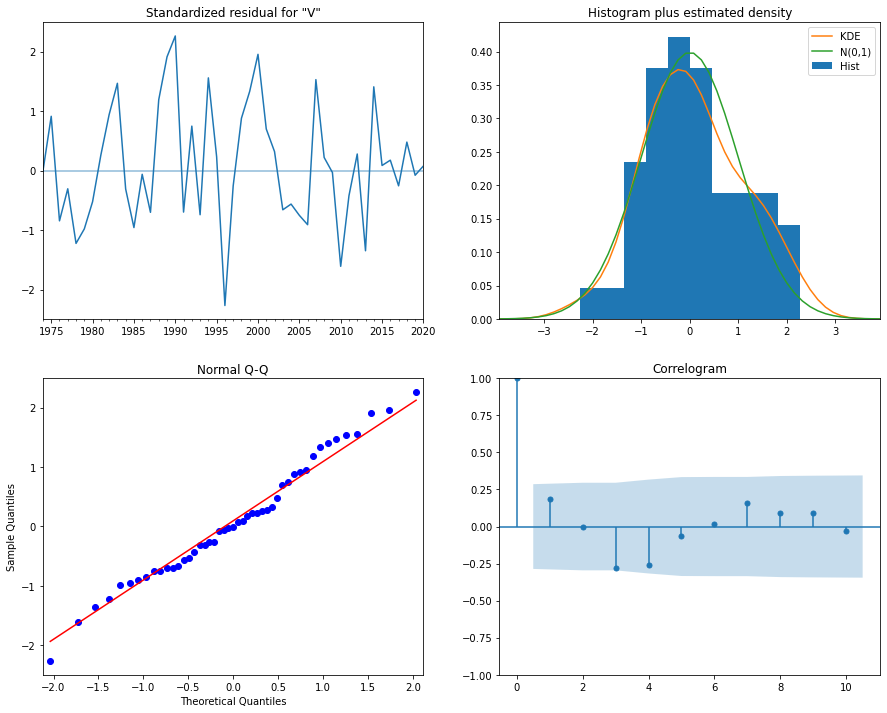

In [50]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

   - In the top right plot, we see that the red KDE line follows better with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
   - The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
   - The residuals over time (top left plot) do not display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.
   - Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

#### 4.5.6 Dynamic forecasting

The _dynamic=False_ argument says that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

In [51]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

Our prediction starts at 2015. Here we will check how well our model is working with the forecasting. 

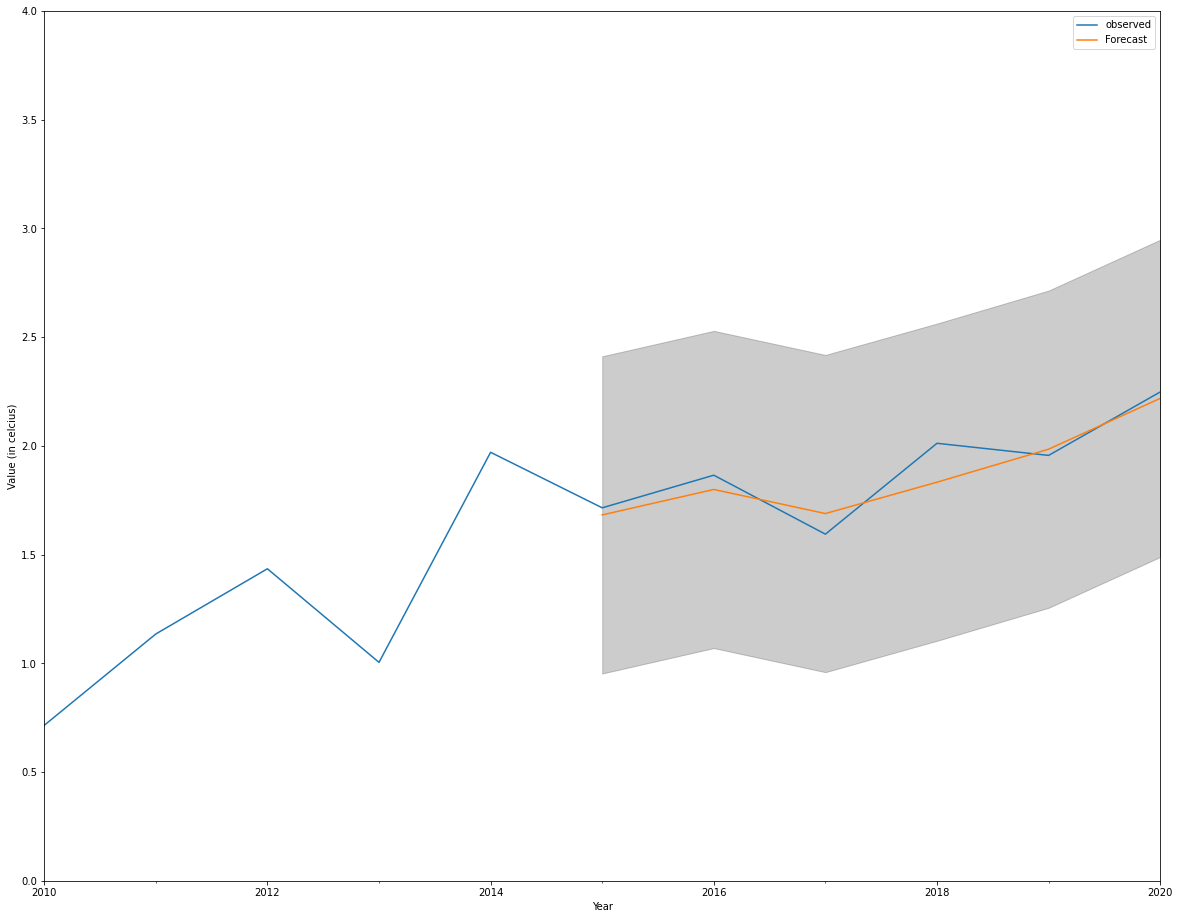

In [52]:
ax = one_step_temperature.Value_actual['2010': ].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)

ax.set_xlabel('Year')
ax.set_ylabel('Value (in celcius)')
plt.ylim([0,4])
plt.legend()
plt.show()

Here we have the prediction of temperature change from 2015. We have compared this data with our actual data from 2010. 

#### 4.5.7 Forecast Diagnostic

It is also useful to quantify the accuracy of our forecasts. We will use the MSE (Mean Squared Error), in which for each predicted value, we compute its distance to the true value and square the result.

In [53]:
y_forecasted = pred.predicted_mean
y_truth = one_step_temperature.Value_actual['2015-01-01':]
print(y_forecasted.shape)
print(y_truth.shape)
# Compute the mean square error
mse = MSE(y_truth, y_forecasted, squared=True)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

(6,)
(6,)
The Mean Squared Error of our forecasts is 0.01


As per the root mean squeared error, our forecasting model works pretty fine. We can forecast our next 10 ears based on this. 

#### 4.5.8 Predicting until 2030

In [54]:
# Creating additional dataset for 10 years to predict the future

future_years=[one_step_temperature.index[-1]+ DateOffset(years=x)for x in range(0,11)]

In [55]:
future_years_temperature=pd.DataFrame(index=future_years[1:],columns=one_step_temperature.columns)
future_years_temperature.tail(10)

,Value_actual,Value_pred
2021-01-01,NaN,NaN
2022-01-01,NaN,NaN
2023-01-01,NaN,NaN
2024-01-01,NaN,NaN
2025-01-01,NaN,NaN
2026-01-01,NaN,NaN
2027-01-01,NaN,NaN
2028-01-01,NaN,NaN
2029-01-01,NaN,NaN
2030-01-01,NaN,NaN


We have created the dataset here for our predicted temperature change values until 2030. 

In [56]:
# merging the columns to predict future from 2020 to 2030

future_years1=pd.concat([one_step_temperature,future_years_temperature])

#### 4.5.9 Our Predictive model from 2020 to 2030

<AxesSubplot:>

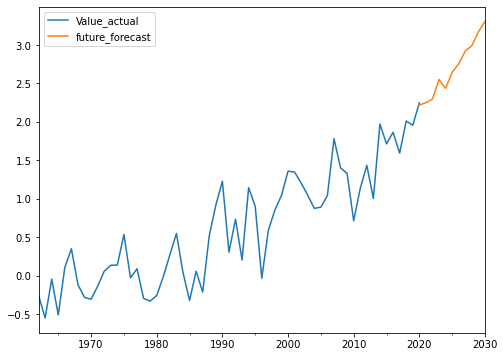

In [57]:
future_years1['future_forecast'] = results.predict(start=pd.to_datetime('2020-01-01'),end=pd.to_datetime('2030-07-01'), dynamic=False)  
future_years1[['Value_actual', 'future_forecast']].plot(figsize=(8,6)) 

So above is the predicted model for the future for ten years. It yeilds an upward trend. 
As we have only taken the temperature change value or a single value to predict itself. That is why there is less fluctuations. 

### <font color = blue>5. Conclusion and Future Scope of work</font>

#### <font color=blue> 5.1. Future Scope of Work </font>
The work here in this project shows a lot of promise. In this time series analysis we have shown that temperature change is also dependant upon geological position. Further work can be continued in this area. 
The prediction model we have used is Seasonal Auto Regressive Integrated Moving Average based on only one variable. But if the data is aquired where other factors for temperature change is included, then other machine learning models like Vector Auto Regression (VAR) models can be used to compare the results and better understanding of temperature change and eventually global warming. 

#### <font color=blue> 5.2. Conclusion </font>

We have started this project with this question, , "What is the present and future trend of temperature change in Europe with regard to carbon and nitrogen emission ? Do sea lines play any significant role in temperature change in Europe?" 
From our analysis we have seen the present and future trend. Then we understood that there is a huge possibility that global positioning of any country can affect her temperature change over time. Lastly we have found out that the emission due to waste plays a significant role in temperature change data.  